<a href="https://colab.research.google.com/github/Ankushraina64/2021A1R059_COM-411/blob/main/Assignment_Soft_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data = data.drop(columns=['Unnamed: 32', 'id'])

In [ ]:
# Convert diagnosis to binary (0 for 'B' and 1 for 'M') to facilitate visualization
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [ ]:
# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

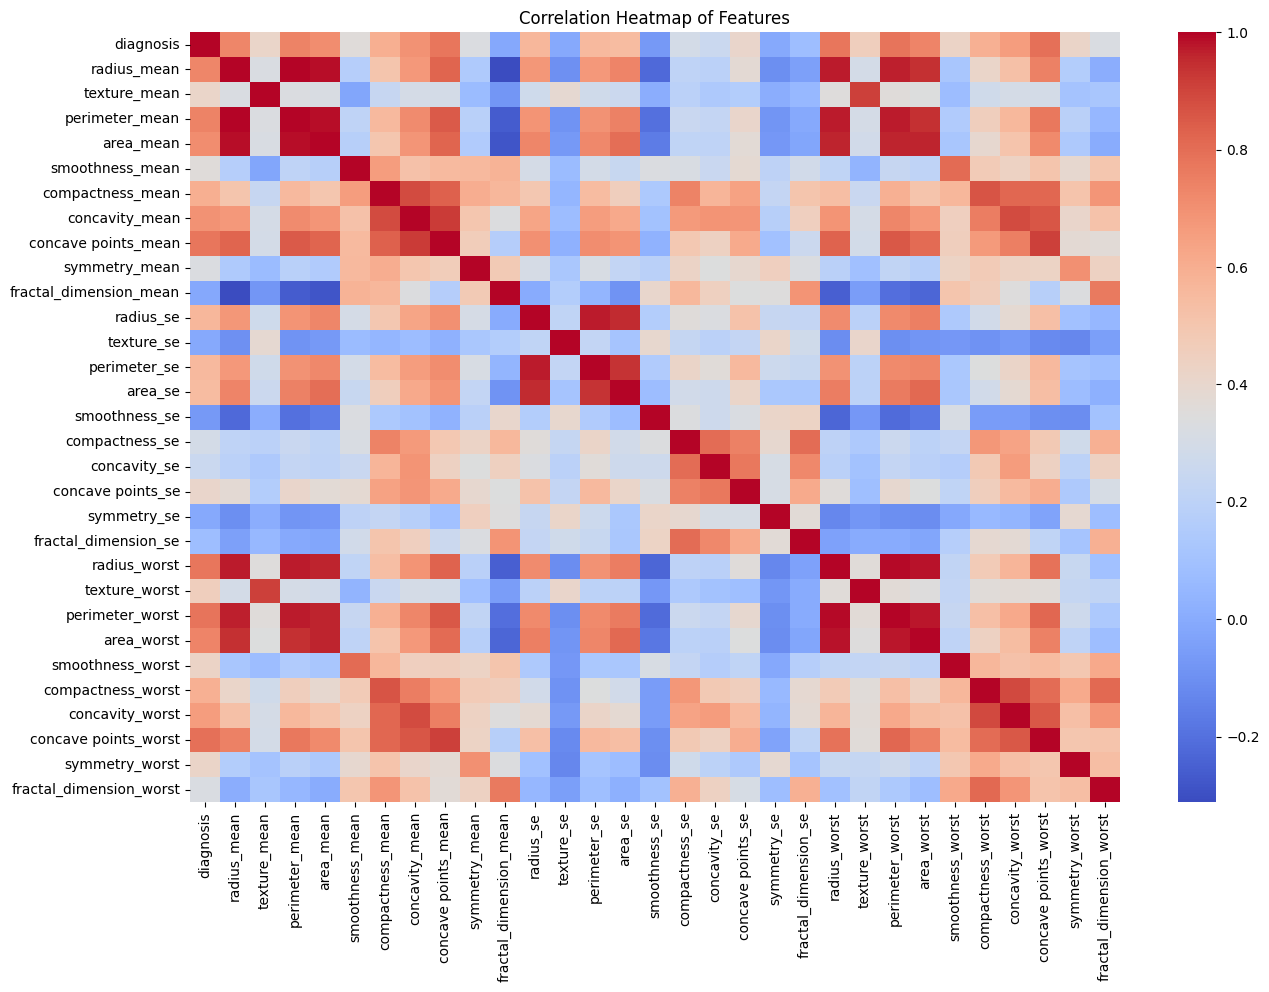

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

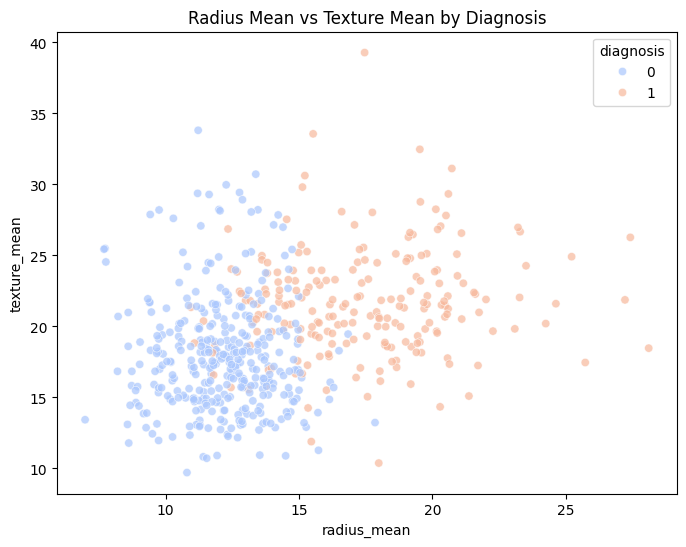

In [ ]:
# Scatter plot of 'radius_mean' vs 'texture_mean' with diagnosis hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis', palette="coolwarm", alpha=0.7)
plt.title('Radius Mean vs Texture Mean by Diagnosis')
plt.show()

In [ ]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
# Check for duplicates
data.duplicated().sum()

# Remove duplicates if any
data_cleaned = data.drop_duplicates()

In [ ]:
# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Additional hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5522 - loss: 0.6504 - val_accuracy: 0.9130 - val_loss: 0.4907
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9550 - loss: 0.3961 - val_accuracy: 0.9348 - val_loss: 0.2491
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1922 - val_accuracy: 0.9348 - val_loss: 0.1537
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.1051 - val_accuracy: 0.9565 - val_loss: 0.1248
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0762 - val_accuracy: 0.9348 - val_loss: 0.1098
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0826 - val_accuracy: 0.9348 - val_loss: 0.0998
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9897 - loss: 0.0511 - val_accuracy: 0.9348 - val_loss: 0.0935
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0562 - val_accuracy: 0.9348 - val_loss:

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.37%


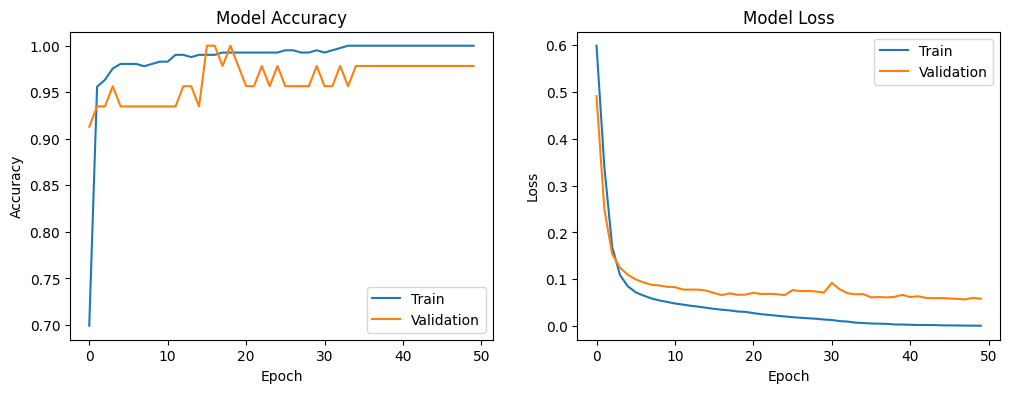

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()

    # First hidden layer with tunable number of units and dropout rate
    model.add(Dense(
        units=hp.Int('units_layer_1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(rate=hp.Float('dropout_layer_1', min_value=0.0, max_value=0.5, step=0.1)))

    # Second hidden layer with tunable number of units and dropout rate
    model.add(Dense(
        units=hp.Int('units_layer_2', min_value=16, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_layer_2', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuner_dir',
    project_name='breast_cancer_classification'
)

In [ ]:
# Run the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.9780219793319702

Best val_accuracy So Far: 0.9890109896659851
Total elapsed time: 00h 01m 28s


In [ ]:
# Retrieve the best model and evaluate on the test set
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0868  
Test Accuracy: 97.37%


In [ ]:
# Display the best hyperparameters found by the tuner
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units (Layer 1): {best_hyperparameters.get('units_layer_1')}")
print(f"Dropout Rate (Layer 1): {best_hyperparameters.get('dropout_layer_1')}")
print(f"Units (Layer 2): {best_hyperparameters.get('units_layer_2')}")
print(f"Dropout Rate (Layer 2): {best_hyperparameters.get('dropout_layer_2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

 #OPtional

Best Hyperparameters:
Units (Layer 1): 64
Dropout Rate (Layer 1): 0.4
Units (Layer 2): 96
Dropout Rate (Layer 2): 0.30000000000000004
Learning Rate: 0.0015137363604311091


In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, recall_score

# Predict the classes (rounded to 0 or 1) on the test set
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity (recall), specificity, and MCC
sensitivity = tp / (tp + fn)  # Recall for the positive class
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_test, y_pred)

# Display the results
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Sensitivity (Recall): 0.95
Specificity: 0.99
Matthews Correlation Coefficient (MCC): 0.94


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
F1 Score: 0.96
